<a href="https://colab.research.google.com/github/Yosolita1978/DogOrForest/blob/main/MoreDogsAndCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Model to classify Dogs and Cats - using my own images to test

In [1]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 84.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.164481,0.040521,0.010149,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.065347,0.016729,0.005413,00:46


In [4]:
import ipywidgets as widgets

In [6]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.002250


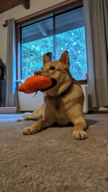

In [8]:
img.to_thumb(192)